Actividades hechas por Daniel Acosta Imandt

# TAREA-08  Análisis del calentamiento global

**Introducción**

El calentamiento global ha llegado a ser un tema importante en los últimos años. El debate sobre el calentamiento global también se ha extendido por todo el mundo. La visualización de la temperatura en la Tierra ha llegado a ser uno de los argumentos más importantes en las conversaciones, por lo que es hora de "trazar" algunos datos.

**Desarrollo**

En esta tarea utilice el código siguiente para analizar las temperaturas promedio en los países. Conforme vaya obteniendo las gráficas mostradas, realice las siguientes actividades solicitadas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [8]:
global_temp_country = pd.read_csv('Temperatures.csv')
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


**Mapeo de temperaturas medias en los países**

In [3]:
# Eliminemos los países duplicados (en el análisis no consideramos la presencia de
# colonias en estos países) y países para los que no hay información sobre la temperatura

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

# Temperatura promedio para cada país
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Temperatura\nPromedio,\n°C')
            )
        ]

layout = dict(
    title = 'Temperatura media de los países en la Tierra',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)', #color del oceano
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,  #Longitud
                    lat = 10), #Latitud
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)' #color del eje de Longitud
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)' #color del eje de Latitud
                )
              ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

# ACTIVIDAD 1

- De acuerdo con la gráfica anterior, y una visualización preliminar, mencione algunos ejemplos de países que tengan temperaturas promedio bajas (como Canadá).
- ¿Dónde es la temperatura más baja? (es claramente visible en el mapa).
- De acuerdo con esta visualización preliminar ¿Dónde es el país más cálido?

### Solución
- A partir de la gráfica anterior se puede notar que algunos ejemplos de los paises que tienen temperaturas promedio bajas como Canadá son: Grenlandia,Rusia, Noruega, Finlandia, que al poner atención son los paises que más al norte se encuentran en la Tierra
- El país que claramente tiene la tempraratura promedio más baja es Grenlandia.
- El país con la tempratura más cálida es dificil de visualizar, ya que allí ya hay bastantes paises con temperaturas más altas, sin duda todos o casi todos de estos senencuentran en el ecuador y el continente más clauroso es Africa, en donde parece ser que Mali es el país más cálido. Al ver los paises mas calidos en la actividad 2 veo que en realidad es Djibouti.

# ACTIVIDAD 2
- Ordene los países por temperatura promedio y trace una gráfica de barras horizontal

In [119]:
dict={}
for i in range(len(countries)):
    dict[countries[i]]=mean_temp[i]
	
dict=sorted(dict.items(), key=lambda x: x[1], reverse=True)


dframe = pd.DataFrame(dict)  
dframe.head()

,0,1
0,Djibouti,28.816603
1,Mali,28.441977
2,Burkina Faso,28.083507
3,Senegal,27.967375
4,Aruba,27.920390


<AxesSubplot:ylabel='0'>

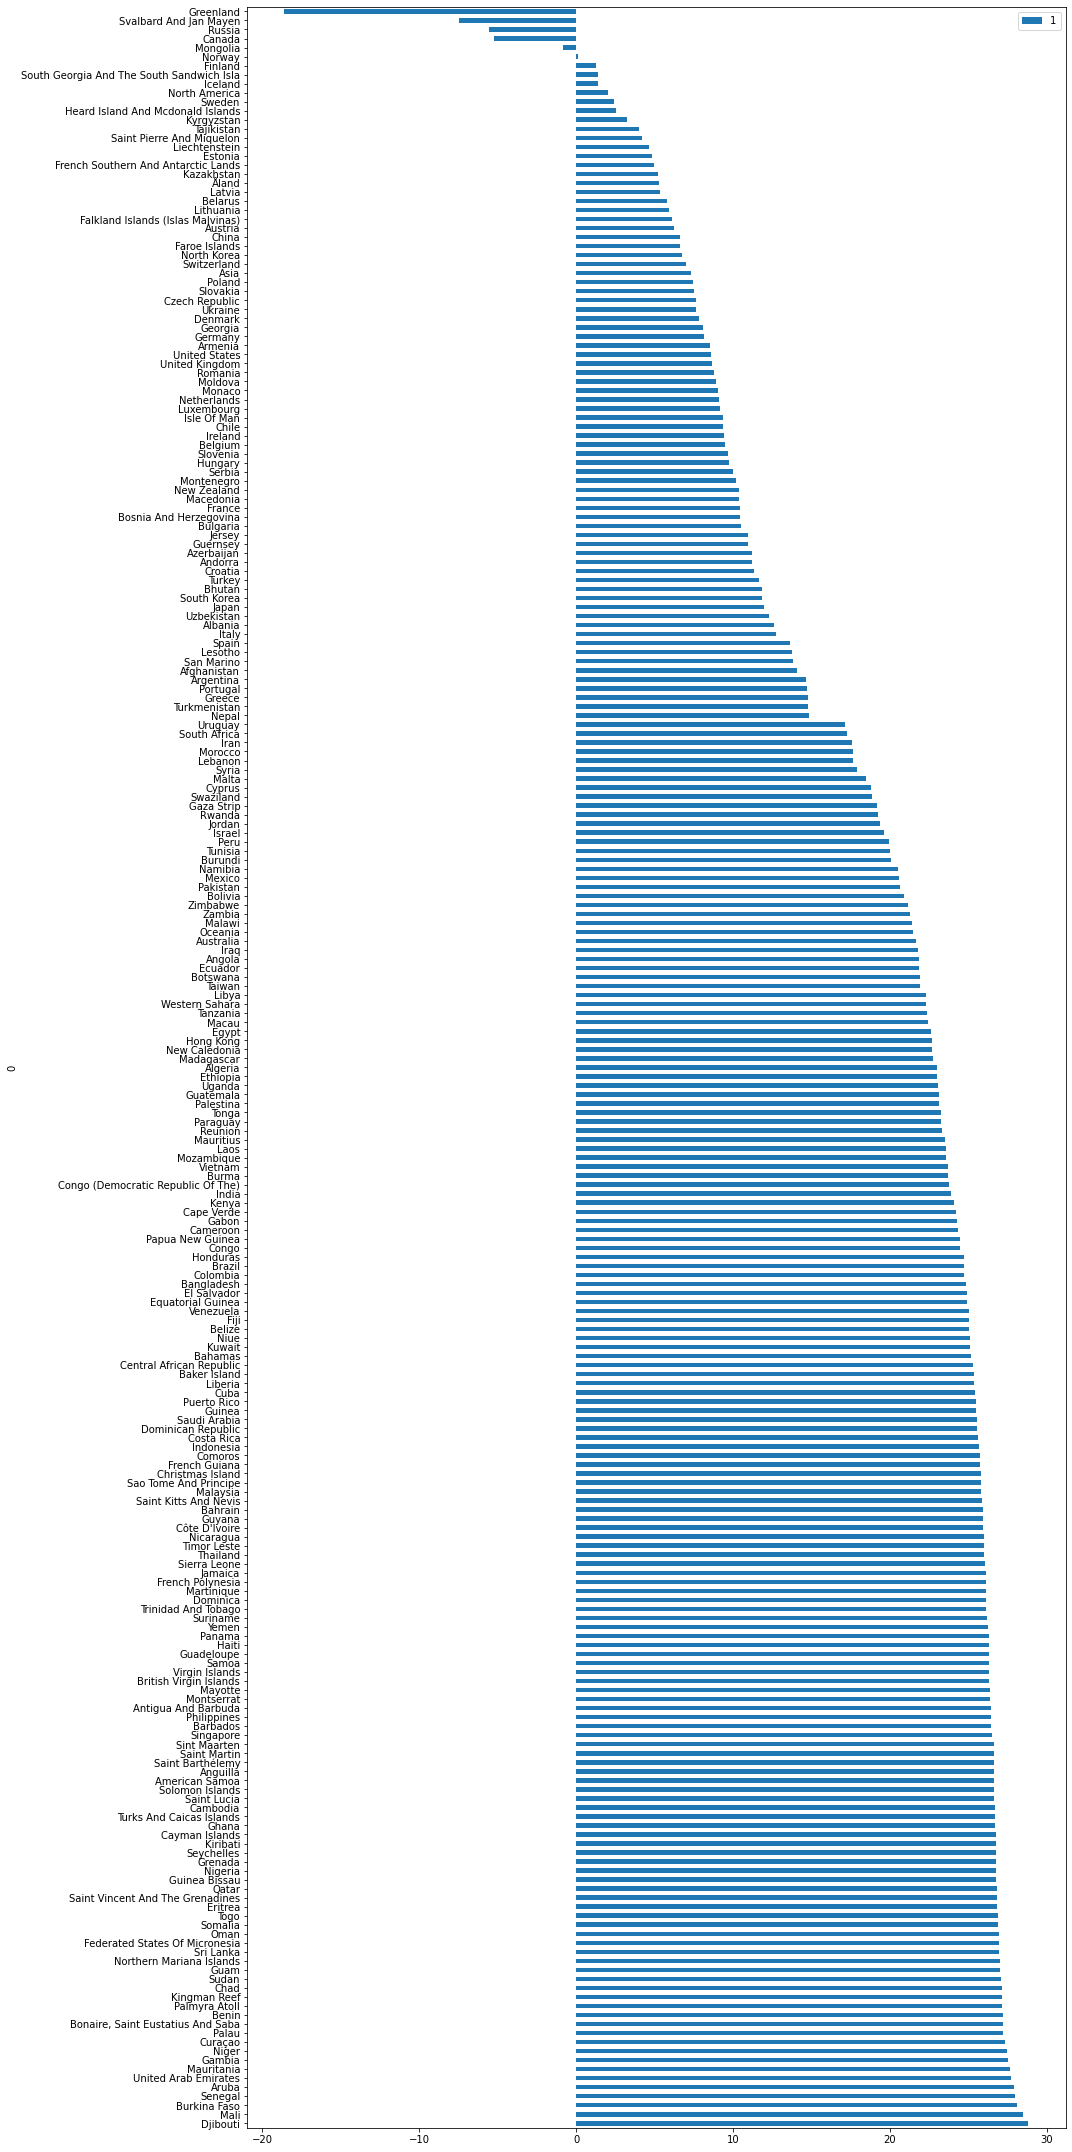

In [142]:
import plotly.express as px
fig = px.bar(dframe, x=0, y=1)
fig.show()
dframe.plot.barh(x=0, y=1,figsize=(15,30))



**Leamos los datos del archivo "GlobalTemperatures.csv", que tiene la temperatura mensual de la Tierra, y grafiquémosla**.

In [4]:
global_temp = pd.read_csv('GlobalTemperatures.csv')

# Extraer el año de una fecha
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='max',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='min',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Temperatura media',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura media, °C'),
    title='Temperatura promedio de la Tierra',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# ACTIVIDAD 3

- De acuerdo a los gráficos ¿Se puede considerar que hay calentamiento global en los últimos años? Describa brevemente. 
- ¿A partir de qué fecha, la superficie terrestre empieza a tener los valores más altos de temperatura?. 

### Solución
- Viendo el gráfico anterior se nota que si ha habido un incremento en la temperatura media de la Tierra, en donde en los ultimos 100 años ha subido casi dos grados centrigrados.
- Es dificil  responder esto ya que las temperaturas  registradas tenian un gran rango de error antes de los 1850, por lo que no se puede saber bien su temperatura, pero tomando fechas en donde el error ya es pequeño en comparación diria que desde los 1840 que corresponde con el final  de la revolución industrial.

**Veamos el gráfico de cambios de temperatura anuales en ciertos continentes (supongamos que tomamos en consideración un país por continente)**.

In [5]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura promedio, °C'),
    title='Temperatura media de la Tierra en los continentes',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

# ACTIVIDAD 4

- ¿A partir de qué año se puede considerar que ha habido un aumento continuo en la temperatura media anual de los países ("continentes") que tomamos en consideración?
- ¿A qué se deberá la interrupción (discontinuidad) de los valores de temperatura en el gráfico?

### Solución
- Al ver el gráfico anterior notamos que  los datos han oscilado, pero que si han tendido a la alza, y parace ser que el alza continua de temperatura comienza alrededor de 1915.

- La interrupción de los valores en el gráfico se debe seguramente a que en esas épocas no se tomaron las temperaturas regularmente para guardar los datos,de hecho en 1862 que hubo una discontinuidad de varios años, Lagos se declaro como una colonia del imperio Británico , por lo que seguro por el cambio de poder se dejaron de tomar los datos o simplemente se perdieron.

# ACTIVIDAD 5

Elabore un breve resúmen de las actividades realizadas y describa una **conclusión** considerando los siguientes aspectos:
- Tendencia global (aumento o disminución, según lo considere) de la temperatura en los últimos años.
- Los factores que piensa que influyen en esta tendencia global.
- Si considera que la tendencia global va en **aumento**, mencione las posibles soluciones.
- Si considera que la tendencia global va a la **baja**, describa ampliamente las causas que provocan ello. 

### Resumen 
Primero se hizo un gráfico interactivo para ver el promedio de la temepratura enla Tierra para los diferentes paises del mundo ,en donde la escala de colores va de azul(más frío) a rojo (más caliente), en donde vimos los países con temperaturas más extremas, donde los vimos de la mayor temperatura a la menor.
Una vez visto las temperaturas por paises se vio la temperatura promedio total del mundo a lo laorgo de los años, empezando por 1750 ,en donde se encotnro que parece ser que si ha habifdo un incremento en la temparetura y ha incremetnado este ritmo en los ultimos años.Al ver un país en específico por cada continente notamos que esta tendencia se ha dado  en cada uno de estos.

### Conclusiones
Al haber hecho una breve exploración de los datos ,encontramos que en efecto la temperatura global ha aumentado desde que se empezaron a tomar los datos de esta, esto se debe a diversaas razones ,entre ellas se encuentra que como sabemos la temperatura de la Tierra a lo larog de los milenios no ha sido constante ,en donde ha habido grandes epocas de calor intenso y otras de glaciaciones, pero no podemos evitar hablar de que los humanos hemos tenido bastante que ver en este incremento, ya que se nota un gran aumento con la industralización y el uso de combustilbes fóciles.Por lo que si queremos frenar o revertir el daño que se ha ocacionado por la mano humana se tiene que actuar de inmediato si no es que ya es demasiado tarde,las mejores formas de hacerlo es parando el uso indiscriminado que se le da a las enerías no renovables y hacer el cambio a una que si lo sean, así mismo debemos deparar con el consumismo que ha marcado estas ultimas generaciones, y con estos casos y muchos cambios más tal vez tengmaos la oportunidad de frenar el cambio climático y encontrar una vida más sustentable. 